[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/ANDREWTOLUTAIWO/poor_people_water_consumption/blob/main/PhD%20Thesis%20MLR%20code.ipynb)

### Training, Validation, Testing and Evaluation Functions

In [104]:
import numpy as np
import pandas as pd
import math
import sys

# Training the model
def training(x1, y1):
    print('TRAINING DATA')
    X_train_prediction = model.predict(x1)
    #Evaluating the trained model
    evaluation(y_train, X_train_prediction)
    
#Validating the model
def validation(x1, y1):
    print('VALIDATION DATA')
    X_valid_prediction = model.predict(x1)
    #Evaluating the validated model
    evaluation(y1, X_valid_prediction)

#Testing the model
def testing(x1, y1):
    print('TESTING DATA')
    X_test_prediction = model.predict(x1)
    #Evaluating the tested model
    evaluation(y1, X_test_prediction)
    

# Predicting with the complete data
def complete_prediction(x1, y1):
    print('COMPLETE DATA')
    X_complete_prediction = model.predict(x1)
    evaluation(y, X_complete_prediction)
    #Convert to dataframe
    pred = pd.DataFrame(X_complete_prediction, columns=['Predicted volume'])
    # Join original data table and pred
    complete_data = pd.DataFrame(pd.concat([data_new, pred], axis=1))
    #Get first 100 records
    #data100 = complete_data.iloc[:100]
    #print into excel csv file
    complete_data.to_csv('predicted_wet_season.csv')
        
# Model evaluation with Mean Absolute Error, Root Mean Square Error and Root Meas Square Percentage Error
def evaluation(x, y):
    np.set_printoptions(precision=2, threshold=sys.maxsize, edgeitems=7)
    mae = np.abs(np.subtract(x, np.asarray(y))).mean()
    print('MAE = ', mae)
    rmse = math.sqrt(np.square(np.subtract(x, y)).mean())
    print('RMSE = ', rmse)
    n = (np.subtract(x, x.mean())*np.subtract(y, y.mean())).sum()
    d = math.sqrt(np.square(np.subtract(x, x.mean())).sum()*np.square(np.subtract(y, y.mean())).sum())
    r2s = np.ceil(np.square(n/d)*100.0)
    print('Rsquared =', r2s, "\n")
   

### Normal Equation Function

In [107]:
def normal_equation(X, y): 
    # A = Coefficient matrix, 
    # y = observation vector, or the target variable,
    # n = number of observations (during training, hould be number of training set), 
   
    from numpy.linalg import inv
    import sys
    import numpy as np
    np.set_printoptions(precision=2, threshold=sys.maxsize, edgeitems=sys.maxsize)
    # set bias term to 1 for each sample and concatenate with A  
    A = np.c_[np.ones((len(X), 1)), X]  
    #print("Coefficient Matrix, A: ", "\n", A, "\n")
    A_transpose = A.T  
    params = inv(A_transpose.dot(A)).dot(A_transpose).dot(y) 
    print('Here are the parameters; intercept is first in the list: ',"\n", params, "\n")
    # normal equation  # theta = (A.T * X)^(-1) * A.T * y  
    # test prediction  
    A2 = np.c_[np.ones((len(X), 1)), X]  
    prediction = A2.dot(params) 
    #print("Prediction: ", "\n", prediction, "\n")
    #Evaluating the output by calling the function Evaluation
    evaluation(y, prediction)
    
    #Convert to dataframe
    pred = pd.DataFrame(prediction, columns=['Predicted volume'])
    # Join original data table and pred
    complete_data = pd.DataFrame(pd.concat([data_new, pred], axis=1))
    
    #print into excel csv file
    complete_data.to_csv('predicted_dry_season_NORMAL.csv')
    
    #print the sums
    print('Total Actual Volume = ', complete_data['Volume'].sum(), "\n")
    print('Total Predicted Volume = ', complete_data['Predicted volume'].sum(), "\n")

### PCA Function

In [110]:
# Principal Component Analysis
def pca(n_components, data1, data2):
    # Scale the data
    from sklearn.preprocessing import StandardScaler
    Xscaled = StandardScaler().fit_transform(data1)
    Xscaled = pd.DataFrame(Xscaled, columns=['ID', 
            'Household income',
            'Education',
            'Household size',
            'Rainfall',
            'Ave temp',
            'Travel time',
            'Amount spent',
            'Willingness to pay',
            'Shortest distance',
            'Height diff',
            'LULC',
            'Kitchen Sink',
            'ToiletWC',
            'Garden',
            'Car',
            'Volume',
            'Gender_male',
            'Gender_female',
            'Method_carried',
            'Method_delivered',
            'Method_borehole',
            'Method_well',
            'Availability_not_often',
            'Availability_often',
            'Quality_poor',
            'Quality_fair',
            'Quality_good',
            'Quality_very good'])
    
    #print(Xscaled)
    #print into excel csv file
    Xscaled.to_csv('data_new_scaled.csv')
    
    # Getting PCA components
    from sklearn.decomposition import PCA
    pcamodel = PCA(n_components)
    pca = pcamodel.fit_transform(Xscaled)
    global X # Making X global so it can be used elsewhere
    X = pd.DataFrame(pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
    print('Explained Variance ', pcamodel.explained_variance_, "\n")
    print('Explained Variance Ratio ', pcamodel.explained_variance_ratio_, "\n")
   
    #print into excel csv file
    X.to_csv('X_data.csv')
    
    #Explained variance plot
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
    plt.ylabel('Explained variance')
    plt.xlabel('Components')
    plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
    plt.legend(loc='upper left')
    plt.show()
       
    #Explained Variance ratio plot
    plt.plot(pcamodel.explained_variance_ratio_)
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()
    
    # Heatmap showing effect of variables on each component
    # Scale the data
    from sklearn.preprocessing import StandardScaler
    Xscaled2 = StandardScaler().fit_transform(data2)
    Xscaled2 = pd.DataFrame(Xscaled2, columns=['Household income',
            'Household size',
            'Rainfall',
            'Ave temp',
            'Travel time',
            'Amount spent',
            'Willingness to pay',
            'Shortest distance',
            'Height diff',
            'Volume',
            'LULC'])
    # Getting PCA components
    from sklearn.decomposition import PCA
    pcamodel2 = PCA(n_components)
    pca2 = pcamodel2.fit_transform(Xscaled2)
    
    ax = sns.heatmap(pcamodel2.components_,
                 cmap='Spectral',
                 yticklabels=[ "PC"+str(x) for x in range(1,pcamodel2.n_components_+1)],
                 xticklabels=list(data_new2.columns),
                 cbar_kws={"orientation": "vertical"}, annot=True)
    ax.set_aspect("equal")


### Multilinear Modeling with PCA

Explained Variance  [3.93 2.34 2.09 1.98 1.94 1.53 1.46 1.28 1.1 ] 

Explained Variance Ratio  [0.16 0.09 0.08 0.08 0.08 0.06 0.06 0.05 0.04] 



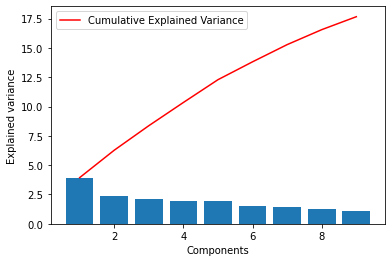

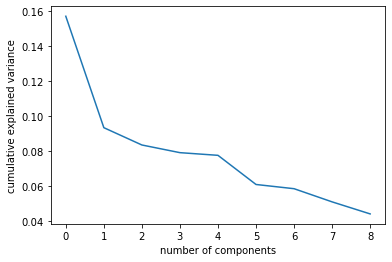

IMPLEMENTING NORMAL EQUATION WITH TRAINING DATA
Here are the parameters; intercept is first in the list:  
 [325.58 -64.58  38.53   6.81   3.86  -5.95   9.76 -33.79  13.13  10.63] 

MAE =  43.38822115171805
RMSE =  55.03321599849704
Rsquared = 89.0 

Total Actual Volume =  311310.0 

Total Predicted Volume =  311310.0000000001 

IMPLEMENTING NORMAL EQUATION WITH VALIDATING DATA
Here are the parameters; intercept is first in the list:  
 [327.43 -67.76  41.49  15.38   4.09  -3.4    6.04 -35.42   5.99   4.82] 

MAE =  40.983262761339134
RMSE =  53.242938231121734
Rsquared = 89.0 

Total Actual Volume =  311310.0 

Total Predicted Volume =  40939.999999999985 

IMPLEMENTING NORMAL EQUATION WITH TESTING DATA
Here are the parameters; intercept is first in the list:  
 [337.11 -66.72  31.12   8.93   4.46 -10.37  60.57 -29.87   1.07   0.34] 

MAE =  44.35021520851198
RMSE =  56.53126639187248
Rsquared = 88.0 

Total Actual Volume =  311310.0 

Total Predicted Volume =  38979.99999999998 

IMP

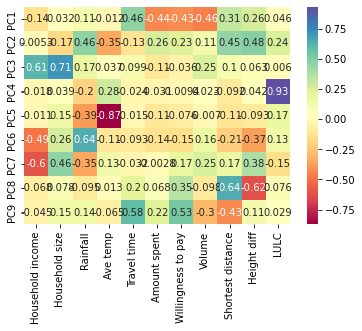

In [114]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# One-Hot Encoding
data = pd.read_csv("dry_season_data 2.csv")

encoded_data = pd.get_dummies(data, columns = ['Gender', 'Method', 'Availability', 'Quality'])

data_new = pd.DataFrame(encoded_data)

data_new2 = data_new.drop(columns=['ID',
            'Education',
            'Kitchen Sink',
            'ToiletWC',
            'Garden',
            'Car',
            'Gender_male',
            'Gender_female',
            'Method_carried',
            'Method_delivered',
            'Method_borehole',
            'Method_well',
            'Availability_not_often',
            'Availability_often',
            'Quality_poor',
            'Quality_fair',
            'Quality_good',
            'Quality_very good'], axis=1)

#Testing the PCA code
pca(9, data_new, data_new2)

# Modeling with the Extracted Features
#Separate target variable from input variables
X    # X is the global variable from function pca; it is dataframe of the extracted PCs
y = data_new['Volume']

# Splitting data_var into training-validation-test set in ratio 80-10-10
# We first split the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

# Now we divide the remaining data equally between valid and test
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

# Developing the model with Pipeline that infuses StandardScaler with SDGRegressor
model = Pipeline([('scaler', StandardScaler()), ('sgd', SGDRegressor(max_iter=10000, tol=1e-3))])

#Fitting the model
model.fit(X_train, y_train)
   

# # Calling the training, validation and testing functions
# training(X_train, y_train)
# validation(X_valid, y_valid)
# testing(X_test, y_test)
# complete_prediction(X, y)

#Calling Normal Equation
print("IMPLEMENTING NORMAL EQUATION WITH TRAINING DATA")
normal_equation(X_train, y_train)
print("IMPLEMENTING NORMAL EQUATION WITH VALIDATING DATA")
normal_equation(X_valid, y_valid)
print("IMPLEMENTING NORMAL EQUATION WITH TESTING DATA")
normal_equation(X_test, y_test)
print("IMPLEMENTING NORMAL EQUATION WITH COMPLETE DATA")
normal_equation(X, y)


### Random Forest Modelling with PCA

Explained Variance  [3.82 2.26 2.04 1.98 1.94 1.57 1.5  1.47 1.15] 

Explained Variance Ratio  [0.15 0.09 0.08 0.08 0.08 0.06 0.06 0.06 0.05] 



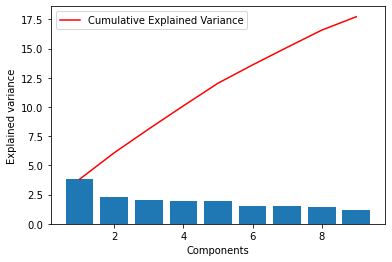

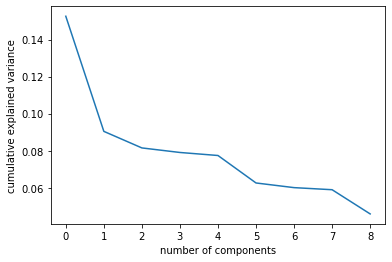

Out of bag score =  0.8405103425441578 

TRAINING DATA
MAE =  40.9336584985937
RMSE =  52.78168091891873
Rsquared = 91.0 

VALIDATION DATA
MAE =  54.03216862714183
RMSE =  71.219143024618
Rsquared = 84.0 

TESTING DATA
MAE =  51.11445383508653
RMSE =  65.73867016091344
Rsquared = 85.0 

COMPLETE DATA
MAE =  43.26158904509767
RMSE =  56.285864844291766
Rsquared = 89.0 

IMPLEMENTING NORMAL EQUATION WITH TRAINING DATA
Here are the parameters; intercept is first in the list:  
 [ 5.32e+02 -6.92e+01 -2.64e+01 -2.24e+01  1.25e+01 -5.08e-01  2.47e+01
 -3.32e+01  1.71e+01  1.61e+01] 

MAE =  45.93688954636882
RMSE =  58.45695648497794
Rsquared = 88.0 

Total Actual Volume =  638510 

Total Predicted Volume =  513020.00000000006 

IMPLEMENTING NORMAL EQUATION WITH VALIDATING DATA
Here are the parameters; intercept is first in the list:  
 [ 5.58e+02 -7.39e+01 -2.43e+01 -3.41e+01  2.13e+01 -1.59e-01  1.35e+02
  8.53e+01  9.35e+01  3.13e+01] 

MAE =  39.902578783787526
RMSE =  51.964626729257354

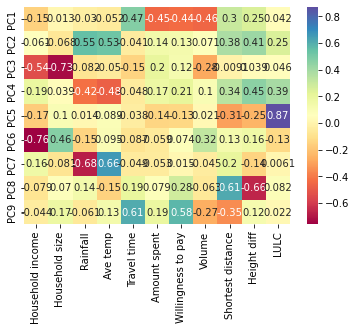

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


# One-Hot Encoding
data = pd.read_csv("wet_season_data 2.csv")

encoded_data = pd.get_dummies(data, columns = ['Gender', 'Method', 'Availability', 'Quality'])

data_new = pd.DataFrame(encoded_data)

data_new2 = data_new.drop(columns=['ID',
            'Education',
            'Kitchen Sink',
            'ToiletWC',
            'Garden',
            'Car',
            'Gender_male',
            'Gender_female',
            'Method_carried',
            'Method_delivered',
            'Method_borehole',
            'Method_well',
            'Availability_not_often',
            'Availability_often',
            'Quality_poor',
            'Quality_fair',
            'Quality_good',
            'Quality_very good'], axis=1)

# Calling the PCA Function
pca(9, data_new, data_new2)

# Modeling with the Extracted Features
#Separate target variable from input variables
X    # X is the global variable from function pca; it is dataframe of the extracted PCs
y = data_new['Volume']

# Splitting data_var into training-validation-test set in ratio 80-10-10
# We first split the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

# Now we divide the remaining data equally between valid and test
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

#Modeling with Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
#Fitting the model
model.fit(X_train, y_train)

# checking the oob score
print('Out of bag score = ', model.oob_score_, '\n')

# Calling the functions
training(X_train, y_train)
validation(X_valid, y_valid)
testing(X_test, y_test)
complete_prediction(X, y)

#Calling Normal Equation
print("IMPLEMENTING NORMAL EQUATION WITH TRAINING DATA")
normal_equation(X_train, y_train)
print("IMPLEMENTING NORMAL EQUATION WITH VALIDATING DATA")
normal_equation(X_valid, y_valid)
print("IMPLEMENTING NORMAL EQUATION WITH TESTING DATA")
normal_equation(X_test, y_test)
print("IMPLEMENTING NORMAL EQUATION WITH COMPLETE DATA")
normal_equation(X, y)

## Support Vector Regression with PCA

Explained Variance  [3.82 2.26 2.04 1.98 1.94 1.57 1.5  1.47 1.15] 

Explained Variance Ratio  [0.15 0.09 0.08 0.08 0.08 0.06 0.06 0.06 0.05] 



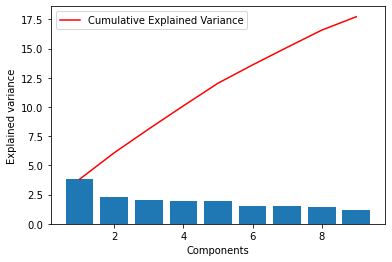

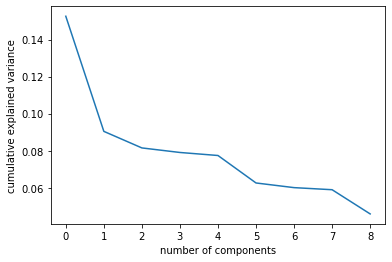

TRAINING DATA
MAE =  63.217371889018295
RMSE =  79.250459284347
Rsquared = 88.0 

VALIDATION DATA
MAE =  60.91192276357269
RMSE =  76.47127704499269
Rsquared = 88.0 

TESTING DATA
MAE =  59.249896005279524
RMSE =  74.11064866078631
Rsquared = 89.0 

COMPLETE DATA
MAE =  62.59007938809982
RMSE =  78.4763192511308
Rsquared = 88.0 

IMPLEMENTING NORMAL EQUATION WITH TRAINING DATA
Here are the parameters; intercept is first in the list:  
 [ 5.32e+02 -6.98e+01 -2.69e+01 -2.26e+01  1.33e+01  4.81e-01  2.80e+01
 -2.99e+01  1.84e+01  1.65e+01] 

MAE =  47.64596740394709
RMSE =  59.33210468718598
Rsquared = 88.0 

Total Actual Volume =  638510 

Total Predicted Volume =  510469.9999999998 

IMPLEMENTING NORMAL EQUATION WITH VALIDATING DATA
Here are the parameters; intercept is first in the list:  
 [542.76 -69.78 -23.9  -37.87  12.14   2.86 105.95  53.79  81.38  22.82] 

MAE =  36.88039014395736
RMSE =  50.9018526096466
Rsquared = 91.0 

Total Actual Volume =  638510 

Total Predicted Volume =

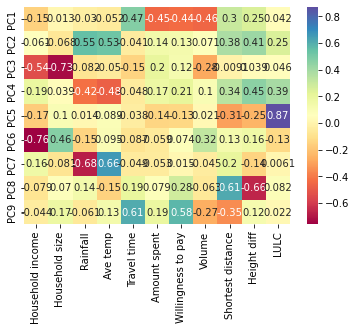

In [83]:
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


# One-Hot Encoding
data = pd.read_csv("wet_season_data 2.csv")

encoded_data = pd.get_dummies(data, columns = ['Gender', 'Method', 'Availability', 'Quality'])

data_new = pd.DataFrame(encoded_data)

data_new2 = data_new.drop(columns=['ID',
            'Education',
            'Kitchen Sink',
            'ToiletWC',
            'Garden',
            'Car',
            'Gender_male',
            'Gender_female',
            'Method_carried',
            'Method_delivered',
            'Method_borehole',
            'Method_well',
            'Availability_not_often',
            'Availability_often',
            'Quality_poor',
            'Quality_fair',
            'Quality_good',
            'Quality_very good'], axis=1)

# Calling the PCA Function
pca(9, data_new, data_new2)

# Modeling with the Extracted Features
#Separate target variable from input variables
X    # X is the global variable from function pca; it is dataframe of the extracted PCs
y = data_new['Volume']

# Splitting data_var into training-validation-test set in ratio 80-10-10
# We first split the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

# Now we divide the remaining data equally between valid and test
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)


#Modeling with Support Vector Regressor
#model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
model = Pipeline([('scaler', StandardScaler()), ('svr', LinearSVR(C=1.0, epsilon=0.2))])

#Fitting the model
model.fit(X_train, y_train)

# Calling the functions
training(X_train, y_train)
validation(X_valid, y_valid)
testing(X_test, y_test)
complete_prediction(X, y)

#Calling Normal Equation
print("IMPLEMENTING NORMAL EQUATION WITH TRAINING DATA")
normal_equation(X_train, y_train)
print("IMPLEMENTING NORMAL EQUATION WITH VALIDATING DATA")
normal_equation(X_valid, y_valid)
print("IMPLEMENTING NORMAL EQUATION WITH TESTING DATA")
normal_equation(X_test, y_test)
print("IMPLEMENTING NORMAL EQUATION WITH COMPLETE DATA")
normal_equation(X, y)

## Multilayer Perceptron ANN with PCA

Explained Variance  [3.93 2.34 2.09 1.98 1.94 1.53 1.46 1.28 1.1 ] 

Explained Variance Ratio  [0.16 0.09 0.08 0.08 0.08 0.06 0.06 0.05 0.04] 



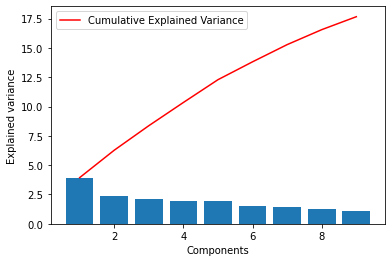

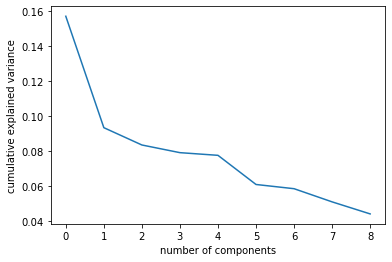

TRAINING DATA
MAE =  29.994606307776305
RMSE =  40.45380903386225
Rsquared = 94.0 

VALIDATION DATA
MAE =  32.949222763972784
RMSE =  44.874325561840266
Rsquared = 92.0 

TESTING DATA
MAE =  38.957153065365155
RMSE =  53.51464406078284
Rsquared = 90.0 

COMPLETE DATA
MAE =  31.186322629154873
RMSE =  42.390573888976604
Rsquared = 93.0 

IMPLEMENTING NORMAL EQUATION WITH TRAINING DATA
Here are the parameters; intercept is first in the list:  
 [326.53 -64.76  38.71   7.7    3.63  -5.56   9.01 -35.38  10.77   9.12] 

MAE =  43.911805363677374
RMSE =  55.35667366678303
Rsquared = 88.0 

Total Actual Volume =  391230 

Total Predicted Volume =  312820.0 

IMPLEMENTING NORMAL EQUATION WITH VALIDATING DATA
Here are the parameters; intercept is first in the list:  
 [ 3.25e+02 -6.78e+01  3.62e+01 -9.17e-02  1.76e+00 -3.74e+00  8.19e+00
 -3.66e+01 -1.50e+00  1.80e+00] 

MAE =  38.30203863162788
RMSE =  48.95513394006278
Rsquared = 90.0 

Total Actual Volume =  391230 

Total Predicted Volume =

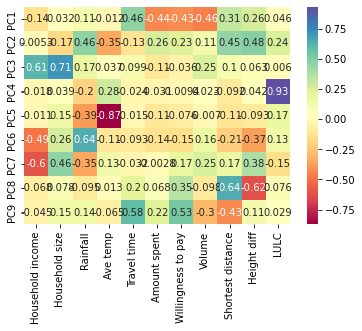

In [88]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# One-Hot Encoding
data = pd.read_csv("dry_season_data 2.csv")

encoded_data = pd.get_dummies(data, columns = ['Gender', 'Method', 'Availability', 'Quality'])

data_new = pd.DataFrame(encoded_data)

data_new2 = data_new.drop(columns=['ID',
            'Education',
            'Kitchen Sink',
            'ToiletWC',
            'Garden',
            'Car',
            'Gender_male',
            'Gender_female',
            'Method_carried',
            'Method_delivered',
            'Method_borehole',
            'Method_well',
            'Availability_not_often',
            'Availability_often',
            'Quality_poor',
            'Quality_fair',
            'Quality_good',
            'Quality_very good'], axis=1)

# Calling the PCA function
pca(9, data_new, data_new2)

# Modeling with the Extracted Features
#Separate target variable from input variables
X    # X is the global variable from function pca; it is dataframe of the extracted PCs
y = data_new['Volume']

# Splitting data_var into training-validation-test set in ratio 80-10-10
# We first split the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

# Now we divide the remaining data equally between valid and test
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

model = Pipeline([('scaler', StandardScaler()), ('sgd', MLPRegressor(hidden_layer_sizes=(32,),
                   activation="relu", 
                   solver='adam',
                   learning_rate_init=0.01,
                   random_state=1, 
                   warm_start=True,
                   max_iter=2000))])
   
# Fitting the model
model.fit(X_train, y_train)

# Calling the functions
training(X_train, y_train)
validation(X_valid, y_valid)
testing(X_test, y_test)
complete_prediction(X, y)

#Calling Normal Equation
print("IMPLEMENTING NORMAL EQUATION WITH TRAINING DATA")
normal_equation(X_train, y_train)
print("IMPLEMENTING NORMAL EQUATION WITH VALIDATING DATA")
normal_equation(X_valid, y_valid)
print("IMPLEMENTING NORMAL EQUATION WITH TESTING DATA")
normal_equation(X_test, y_test)
print("IMPLEMENTING NORMAL EQUATION WITH COMPLETE DATA")
normal_equation(X, y)